<h1 style="text-align: center;"> Estadística </h1>
<h1 style="text-align: right; font-size: 24px; margin-right: 10px;"> </h1>

In [22]:
import pandas as pd
import numpy as np
import math
from collections import Counter
from scipy.stats import gmean # Para sacar la media geometrica
from scipy.stats import describe # Para sacar algunos datos descriptivos
from scipy.stats import skew # Para sacar la asimetria 
from scipy.stats import kurtosis # Para sacar la curtosis
from scipy.stats import kstest # Para sacar la prueba de Kolmogorov-Smirnov
from scipy.stats import f
#from scipy.stats import norm # Para tener el objeto de una distribucion normal
import scipy.stats
import sklearn.preprocessing
import sklearn.utils
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.diagnostic import lilliefors

## Ejercicio 1. Cráneos egipcios

In [23]:
df = pd.read_excel("datosejercicioevaluacionanchuras.xlsx")

tempr = df[df["Época histórica"]==1]
tempr = tempr["Anchura del cráneo"]
tempr_arr = np.array(tempr)

tard = df[df["Época histórica"]==2]
tard = tard["Anchura del cráneo"]
tard_arr = np.array(tard)


In [24]:
registros, columnas_df = df.shape
registros, columnas_df

(60, 2)

### a.1. Obtener con Python las diferentes medidas de centralización y dispersión, asimetría y curtosis estudiadas. 

En los siguientes ejercicios, la mayoría de lo que se pide está impementado en python como funciones o métodos en alguna librería, es por ello que además de usar estas funciones he decidido realizar las cuentas a manos. Esto es para que yo aprenda mejor estos conceptos y es únicamente informació rebundante.

Las medidas estudiadas son:
* Medidas de posisción central
    * Media
        * Media aritmetica
        * Media geometrica
    * Mediana 
    * Moda
* Medidas de posición no centrales
    * Cuartiles
    * Deciles 
    * Percentiles
* Medias de dispersión 
    * Rango
    * Varianza
    * Desviación típica
    * Coeficiente de variación de Pearson
* Medidas de forma 
    * Asimetría 
    * Curtosis


Empezaré usando las funciones integradas en las diferentes librerias de python.

In [25]:
count_tempr = int(len(tempr))
count_tard = int(len(tard))

# Medidas de posición central
## Media aritmetica
media_tempr = tempr.mean()
media_tard = tard.mean()

## Media geometrica 
mgeo_tempr = gmean(tempr)
mgeo_tard = gmean(tard)

## Mediana
mediana_tempr = tempr.median()
mediana_tard = tard.median()

## Moda
moda_tempr = tempr.mode().iloc[0]
moda_tard = tard.mode().iloc[0]

# Medidas de posicion no central
## Cuarrtiles
cuartil_25_tempr = tempr.quantile(0.25)
cuartil_25_tard = tard.quantile(0.25)
cuartil_75_tempr = tempr.quantile(0.75)
cuartil_75_tard = tard.quantile(0.75)

## Deciles
decil_10_tempr = tempr.quantile(0.1)
decil_10_tard = tard.quantile(0.1)

## Percentiles
percentil_1_tempr = tempr.quantile(0.01)
percentil_1_tard = tard.quantile(0.01)

# Medidas de dispersion
stats_tempr = describe(tempr)
stats_tard = describe(tard)

## Rango
rango_tempr = stats_tempr.minmax[1] - stats_tempr.minmax[0]
rango_tard = stats_tard.minmax[1] - stats_tard.minmax[0]

## Varianza
### Usando scipy
var_tempr = stats_tempr.variance
var_tard = stats_tard.variance

### Usando pandas
var_tempr_2 = tempr.var()
var_tard_2 = tard.var()

## Desviacion tipica
desv_tempr = math.sqrt(var_tempr)
desv_tard = math.sqrt(var_tard)

## Coeficiente de variacion de Pearson
CV_tempr = desv_tempr/media_tempr
CV_tard = desv_tard/media_tard 

# Medidas de forma
## Asimetria
asim_tempr = stats_tempr.skewness
asim_tard = stats_tard.skewness

## Curtosis
curtosis_tempr = stats_tempr.kurtosis
curtosis_tard = stats_tard.kurtosis
curtosis_tempr_2 = kurtosis(tempr)
curtosis_tard_2 = kurtosis(tard)
print(curtosis_tard_2, curtosis_tempr_2)

-0.18623697303495312 1.304372302495782


In [26]:
# Realizacion de la tabla de comparación
#-----------------------------------
def series_medidas(lista_valores):
    nombre_series = ["Count", "Media", "Media geometrica", "Mediana", "Moda",
                     "Cuartil 25", "Cuartil 75", "Decil 10", "Percentil 1",
                     "Rango", "Varianza", "Desviación típica", "Coeficiente de variacion de Pearson",
                     "Coeficiente de asimetria de Fisher", "Coeficiente Curtosis"]
    
    series_dict = dict()
    for i in range(len(nombre_series)):
        series_dict[nombre_series[i]] = lista_valores[i]

    return pd.Series(series_dict)

medidas_tempr = [count_tempr, media_tempr, mgeo_tempr, mediana_tempr, moda_tempr,
                 cuartil_25_tempr, cuartil_75_tempr, decil_10_tempr, percentil_1_tempr,
                 rango_tempr, var_tempr, desv_tempr, CV_tempr,
                 asim_tempr, curtosis_tempr]
series_tempr = series_medidas(medidas_tempr)

medidas_tard = [count_tard, media_tard, mgeo_tard, mediana_tard, moda_tard,
                cuartil_25_tard, cuartil_75_tard, decil_10_tard, percentil_1_tard,
                rango_tard, var_tard, desv_tard, CV_tard,
                asim_tard, curtosis_tard]
series_tard = series_medidas(medidas_tard)



# ---------------------------------------------------------
columnas_predinastico = ["Predinástico temprano", "Predinástico tardío"]

medidas_df = pd.DataFrame({columnas_predinastico[0]: series_tempr, columnas_predinastico[1]: series_tard})
medidas_df

,Predinástico temprano,Predinástico tardío
Count,30.000000,30.000000
Media,131.533333,132.466667
Media geometrica,131.530873,132.462963
Mediana,131.500000,133.000000
Moda,131.000000,133.000000
Cuartil 25,131.000000,132.000000
Cuartil 75,132.000000,133.000000
Decil 10,131.000000,131.000000
Percentil 1,130.000000,131.000000
Rango,4.000000,4.000000


Conclusiones de estos datos:
* **Coeficiente de variacion**: Al tener unos coeficientes de variación tan pequeños podemos decir en ambos casos que los datos estan agrupados cerca de la media. 
* **Coeficiente de asimetría**: Ambos coeficientes son positivos, entonces la cola de la distribución se extiende para valores superiores a la media.
* **Coeficiente de curtosis**: 

In [27]:
# Medidas de posición central
## Media aritmetica
def media(datos):
    return datos.sum() / len(datos)

media_tempr_1 = media(tempr)
media_tard_1 = media(tard)
print(media_tempr_1)

## Media geometrica 
def media_geo(datos_arr):
    geo = np.exp(np.sum(np.log(datos_arr))*(1/len(datos_arr)))
    return geo

mgeo_tempr_1 = media_geo(tempr_arr)
mgeo_tard_1 = media_geo(tard_arr)

## Mediana
def mediana(datos_arr):
    ordenados = np.sort(datos_arr)
    registros = len(datos_arr)
    if registros % 2 == 1:
        mediana_1 = ordenados[registros//2-1]
    else:
        mediana_1 = (ordenados[int(registros/2)-1]+ordenados[int(registros/2)])/2

    return mediana_1

mediana_tempr_1 = mediana(tempr_arr)
mediana_tard_1 = mediana(tard_arr)

## Moda
def moda(datos):
    contador = Counter(datos)
    return contador.most_common(1)[0][0]

moda_tempr_1 = moda(tempr)
moda_tard_1 = moda(tard)

# Medidas de posicion no central
## He decidido no hacer estos valores porque me parece un trabajo rebundantes, teniendo en cuenta que 
## bastante parecido al calculo de la mediana
cuartil_25_tempr_1 = cuartil_75_tempr_1 = decil_10_tempr_1 = percentil_1_tempr_1 = ""
cuartil_25_tard_1 = cuartil_75_tard_1 = decil_10_tard_1 = percentil_1_tard_1 = ""
# Medidas de dispersion
## Rango
rango_tempr_1 = tempr.max() - tempr.min()
rango_tard_1 = tard.max() - tard.min()

## Varianza
### Genero la funcion N para que si quiero cambiar N a N-1 poderlo hacer facilemnte
N = lambda datos: len(datos)-1

def varianza(datos_arr):
    varianza = np.sum((datos_arr - datos_arr.mean())**2)/N(datos_arr)
    return varianza

var_tempr_1 = varianza(tempr_arr)
var_tard_1 = varianza(tard_arr)

## Desviacion tipica
desv_tempr_1 = math.sqrt(var_tempr_1)
desv_tard_1 = math.sqrt(var_tard_1)

## Coeficiente de variacion de Pearson
CV_tempr_1 = desv_tempr_1/media_tempr_1
CV_tard_1 = desv_tard_1/media_tard_1

# Medidas de forma
## Asimetria
def asimetria_1(datos_arr, des_std):
    numerador = np.sum((datos_arr - datos_arr.mean())**3)
    asimetria = numerador/((N(datos_arr))*(des_std**3))
    return asimetria

def asimetria_2(datos_arr, varianza):
    numerador = np.sum((datos_arr - datos_arr.mean())**3)/N(datos_arr)
    asimetria = numerador/(varianza**(3/2))
    return asimetria

asim_tempr_1 = asimetria_1(tempr_arr, desv_tempr_1)
asim_tard_1 = asimetria_1(tard_arr, desv_tard_1)

asim_tempr_2 = asimetria_2(tempr_arr, var_tempr_1)
asim_tard_2 = asimetria_2(tard_arr, var_tard_1)

## Curtosis
def curtosis(datos_arr, varianza):
    numerador = np.sum((datos_arr - datos_arr.mean())**4)
    curtosis = numerador/(N(datos_arr)*varianza**2)-3
    return curtosis

curtosis_tempr_1 = curtosis(tempr_arr, var_tempr_1)
curtosis_tard_1 = curtosis(tard_arr, var_tard_1)
    

131.53333333333333


In [28]:
# Realizacion de la tabla de comparacion
# -------------------------------------------------------------
medidas_tempr_1 = [media_tempr_1, mgeo_tempr_1, mediana_tempr_1, moda_tempr_1,
                 cuartil_25_tempr_1, cuartil_75_tempr_1, decil_10_tempr_1, percentil_1_tempr_1,
                 rango_tempr_1, var_tempr_1, desv_tempr_1, CV_tempr_1,
                 asim_tempr_1, curtosis_tempr_1]
series_tempr_1 = series_medidas(medidas_tempr_1)

medidas_tard_1 = [media_tard_1, mgeo_tard_1, mediana_tard_1, moda_tard_1,
                cuartil_25_tard_1, cuartil_75_tard_1, decil_10_tard_1, percentil_1_tard_1,
                rango_tard_1, var_tard_1, desv_tard_1, CV_tard_1,
                asim_tard_1, curtosis_tard_1]
series_tard_1 = series_medidas(medidas_tard_1)

# -------------------------------------------------------------
# columnas_calculo = ["Funciones de librerias", "Cálculo a mano", "Otra funcion de libreria"]
columnas_calculo = ["Funciones de librerias", "Cálculo a mano"]

def multiIndex_df(datos_arr, columnas=[columnas_predinastico, columnas_calculo]):
    columns = pd.MultiIndex.from_product(columnas)

    columnas_dict = dict()

    for i in range(len(columnas[0])):
        for j in range(len(columnas[1])):
            columnas_dict[i*2+j] = (columnas_predinastico[i], columnas_calculo[j])

    df1 = pd.DataFrame({columnas_dict[0]: datos_arr[0],
                        columnas_dict[1]: datos_arr[1],
                        columnas_dict[2]: datos_arr[2],
                        columnas_dict[3]: datos_arr[3]}, columns = columns)
    return df1


df1 = multiIndex_df([series_tempr, series_tempr_1, series_tard, series_tard_1])
df1

IndexError: list index out of range

### a.2 Diagramas de caja y bigotes.

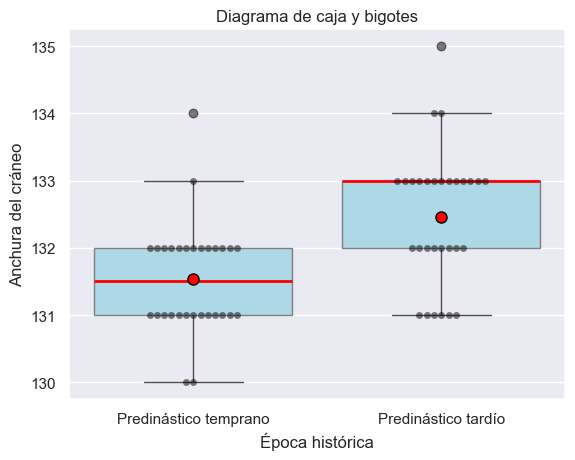

In [17]:

sns.boxplot(x='Época histórica', y='Anchura del cráneo', data=df,boxprops=dict(facecolor='lightblue', edgecolor='gray'),
            showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"8"},
            medianprops={'color': 'red', 'linewidth': 2})
sns.swarmplot(x='Época histórica', y='Anchura del cráneo', data=df, color='black', alpha=0.5)
sns.set(style="darkgrid")
plt.title('Diagrama de caja y bigotes')
plt.xticks(ticks=[0,1], labels=["Predinástico temprano", "Predinástico tardío"])
plt.show()

En el diagrama de caja y bigotes he decidido añadir el valor de la media, únicamente para ilustrar donde se situaría. Sé que está mal poner la media ya que no es un estadístico robusto y no da información relevante, pero creo que puede ser una ayuda.

## b. Determinar si las dos clases de muestras siguen una distribución normal mediante el test Kolmogorov-Smirnov.

Nuestro contraste de Kolmogorov-Smirnov-Lilliefords tiene las dos posibles hipotésis:
* $H_0$: La muestra proviene de un modelo continuo F(x), el cual sigue una distribución normal.
* $H_1$: La muestra no proviene de una distrución normal.

Cuando en nuestra muestra existe un registro que tiene una probabilidad muy pequeña de ocurrir en caso de que $H_0$ sea cierto, deberiamos empezar a dudar de que la hipotesis nula sea cierta. Es por ello que en un contraste es necesario definir un nivel de significación $\alpha$, el cual nos indica que si encontramos un registro con una probabilidad $\alpha$ de ocurrir en nuestra muestra deberiamos rechazar la $H_0$. Visto de otra manera, este número puede interpretarse como la probabilidad que estamos dispuestos a asumir de rechazar $H_0$ cuando es cierta.
Para nuestro problema hemos decidio usar:
$$
\alpha = 0.05
$$
Lo cual en las tablas tabuladas del contraste de Kolmogorov-Smirnov nos da un valor crítico de:
$$
nivel\; crítico = 0.242
$$

Teniendo $\alpha$ fijado, nuestra región de rechazo estará determinada por $d_c$ el cual es la discrepancia máxima que estamos dispuestos a permitir. $d_c$ es elegida tal que:
$$
P(d>d_c|H_0 \quad es \: cierta)=\alpha
$$

El *nivel crítico* o *p-value* del contraste nos indica la probabilidad de obtener un valor igual de extremo que la de nuestra muestra, cuando $H_0$ es cierta.
$$
p=Prob(d\geq \hat{d}/H_0)
$$

En caso de que nuestro *valor crítico* o *p-value* sea inferior a nuestro $\alpha$, significará que la probabilidad de encontrar una muestra como la que tenemos, de una población donde $H_0$ es verdadero, será una probabilidad muy baja y para no cometer errores de tipo I podremos negar la hipotesis nula.

Para realizar este contraste compararemos la distribución teórica F(x), con la empírica $F_n(x)$.
$$
F_n(x)=
\begin{cases}
    0,\quad si\quad x<x_{(1)}\\
    \frac{r}{n},\quad si\quad x_{(r)}<=x<x_{(r+1)}\\
    1,\quad si\quad x>=x_{(n)}
\end{cases}
$$




El contraste de Kolmogorov-Smirnov tiene el inconveniente de que al calcular F(x) estimando los parámetros de la población mediante la muestra, el contraste tiende a aceptar la hipótesis nula $H_0$.

Para estos casos donde se utilizan los parámetros de la muestra para calcular F(x) la corrección Lilliefords suele dar mejores resultados.
* $\mu \to \bar{x}$
* $\sigma^2 \to \hat{s}^2$

El problema con esta corrección es que para tamaños muestrales medianos la potencia es baja. Así que al final he decidido usar el contraste sin la corrección de Lilliefors, ya que no estoy seguro de su resultado.

In [10]:
# Usando la libreria de sklearn
def estandarizador(datos):
    estandar = sklearn.preprocessing.StandardScaler()
    return estandar.fit_transform(datos)

stand_tempr = estandarizador(tempr_arr.reshape(-1,1)).flatten()
stand_tard = estandarizador(tard_arr.reshape(-1,1)).flatten()
# pd.DataFrame({"Predinastico temprano": stand_tempr, "Predinastico tardio": stand_tard})

In [11]:
# Creandola yo
def estandarizador_1(datos, media, desviacion):
    estandar = (datos-media)/desviacion
    return estandar

stand_tempr_1 = estandarizador_1(tempr_arr, media_tempr, desv_tempr)
stand_tard_1 = estandarizador_1(tard_arr, media_tard, desv_tard)
# pd.DataFrame({"Predinastico temprano": stand_tempr_1, "Predinastico tardio": stand_tard_1})

In [ ]:
df2 = multiIndex_df([stand_tempr, stand_tempr_1, stand_tard, stand_tard_1])
df2.head(5)

Predinástico temprano                   Predinástico tardío               
  Funciones de librerias Cálculo a mano Funciones de librerias Cálculo a mano
0               1.820733       1.790130              -0.470871      -0.462957
1              -0.662085      -0.650956               0.538138       0.529093
2              -0.662085      -0.650956              -1.479880      -1.455006
3               0.579324       0.569587               0.538138       0.529093
4               3.062142       3.010674               0.538138       0.529093

Bueno ahora vamos a realizar la combrobación de si ambas muestras provienen de una distribución normal o no.

In [13]:
statistic_tempr, pvalue_tempr = scipy.stats.ks_1samp(stand_tempr, scipy.stats.norm.cdf)
statistic_tard, pvalue_tard = scipy.stats.ks_1samp(stand_tard, scipy.stats.norm.cdf)

df3 = pd.DataFrame([[statistic_tempr, statistic_tard], [pvalue_tempr, pvalue_tard]], 
                   columns=columnas_predinastico,
                   index=["Estadistico",
                           "p value"])
df3

,Predinástico temprano,Predinástico tardío
Estadistico,0.246042,0.238093
p value,0.043795,0.055727


Realicemos el estudio de los resultados del contraste:

**Predinástico temprano**
* Estadístico nos indica el valor de discrepancia superior al permitido por el contraste, por lo que se debe rechazar la hipotesis nula.
* p value nos indica que esta muestra es poco probable que ocurra al recoger 30 registros de una población con $H_0$ verdadera.

En resumen, en el predinastico temprano se podría decir que se rechaza la hipotesis nula. Pero al ser una muestra con 30 registros no hay evidencia estadistica sufuciente para rechazarla. Asumiremos que es una distribución normal para los siguientes ejercicios aunque es posible que no lo sea

**Predinastico tardío**
* Estadistico nos indica una discrepancia incluida en la región de aceptación.
* p-value nos indica que existe una probabilidad aceptable de que nuestra muestra sea de la población definida en $H_0$
Se puede concluir que en el predinástico tardío se acepta la hipotesis nula.

## Ejercicio 2. 

### a. Con los mismos datos del ejercicio anterior, obtener un intervalo de confianza (de nivel 0.9, de nivel 0.95 y de nivel 0.99) para la diferencia entre las medias de la anchura de la cabeza en ambos periodos históricos. 
Interpretar los resultados obtenidos y discutirlos en función del test de normalidad del ejercicio anterior. La interpretación debe ser rigurosa desde el punto de vista estadístico y también marcada por el story telling, es decir, comprensible desde el punto de vista de las variables respondiendo a la pregunta ¿en qué época la cabeza era más ancha?

Primero debemos asegurarnos de que se cumplen las siguientes condiciones:
* Definir que las muestras son independientes. Este dato viene dado en el apartado b, dictaminando que si son independientes.
* Saber si las varianzas poblacionales son desconocidas. Como en el enunciado no nos dan las varianzas, las daremos por desconocidas.
* Demostrar si las varianzas poblacionales son iguales o diferentes

Primero deberemos averiguar si las dos poblaciones normales(se que hemos detallado en el apartado anterior que los datos del *Predinastico temprano* no siguen una distribución normal, pero realizaremos los calculos como si lo fuera) tienen la misma varianza, para ello plantearemos las siguientes hipotesis:

$$ H_0: \sigma_1^2 = \sigma_2^2$$
$$ H_1: \sigma_1^2 \neq \sigma_2^2$$

Para llevar a cabo esta comparación la discrepancia entre las varianzas muestrales será:
$$ d=\frac{\hat{s}_1^2}{\hat{s}_2^2}=F_{(n_1-1;n_2-1)}$$
Ahora definiremos la región de aceptación con los valores $F_a$ y $F_b$ tales que:
$$ P(F_a\leq F\leq F_b)=1-\alpha$$


In [ ]:
alpha = 0.05
gl_tempr = count_tempr-1
gl_tard = count_tard-1
f_critical_lower = f.ppf(alpha / 2, gl_tempr, gl_tard)  
f_critical_upper = f.ppf(1 - alpha / 2, gl_tempr, gl_tard) 